<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw6/hw6_p2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn    as nn
import torch.optim as optim

from   sklearn.metrics import confusion_matrix
import seaborn as sns

import datetime

import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
from   matplotlib.pyplot import figure

from   torchvision import datasets
from   torchvision import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Intro_to_ML/hw6/models/'

In [ ]:
cifar10 = datasets.CIFAR10('data', train=True, download=True)      # training set
cifar10_val = datasets.CIFAR10('data', train=False, download=True) # validation set

100%|██████████| 170498071/170498071 [00:02<00:00, 73937528.19it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


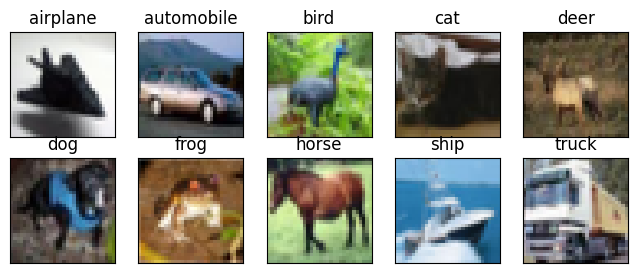

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [ ]:
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

cifar10_val = datasets.CIFAR10('data', train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 1024),
            nn.Tanh(),
            nn.Linear(1024, 256),
            nn.Tanh(),
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1))

In [ ]:
#count trainable parameter
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]
sum(numel_list)

2363658

In [45]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)


learning_rate = 0.01
n_epochs = 300

optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

loss_history = []
start_time = datetime.datetime.now()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    loss_history.append(loss.item())

end_time = datetime.datetime.now()

Epoch: 0, Loss: 1.789874
Epoch: 1, Loss: 1.664942
Epoch: 2, Loss: 1.407625
Epoch: 3, Loss: 2.072511
Epoch: 4, Loss: 1.599761
Epoch: 5, Loss: 1.319054
Epoch: 6, Loss: 1.564217
Epoch: 7, Loss: 1.401500
Epoch: 8, Loss: 1.525085
Epoch: 9, Loss: 1.507033
Epoch: 10, Loss: 1.205529
Epoch: 11, Loss: 0.997531
Epoch: 12, Loss: 1.262533
Epoch: 13, Loss: 1.382616
Epoch: 14, Loss: 1.029411
Epoch: 15, Loss: 1.115478
Epoch: 16, Loss: 0.817008
Epoch: 17, Loss: 0.765522
Epoch: 18, Loss: 0.744002
Epoch: 19, Loss: 1.040571
Epoch: 20, Loss: 0.569110
Epoch: 21, Loss: 1.313763
Epoch: 22, Loss: 0.797078
Epoch: 23, Loss: 0.920362
Epoch: 24, Loss: 0.889542
Epoch: 25, Loss: 0.997293
Epoch: 26, Loss: 0.365126
Epoch: 27, Loss: 0.744081
Epoch: 28, Loss: 0.654161
Epoch: 29, Loss: 0.810068
Epoch: 30, Loss: 0.384420
Epoch: 31, Loss: 0.624978
Epoch: 32, Loss: 0.676721
Epoch: 33, Loss: 0.227642
Epoch: 34, Loss: 0.597087
Epoch: 35, Loss: 0.390714
Epoch: 36, Loss: 0.303221
Epoch: 37, Loss: 0.127924
Epoch: 38, Loss: 0.177

In [46]:
training_time = end_time - start_time
print('Training time: ', str(training_time))

Training time:  2:42:02.118042


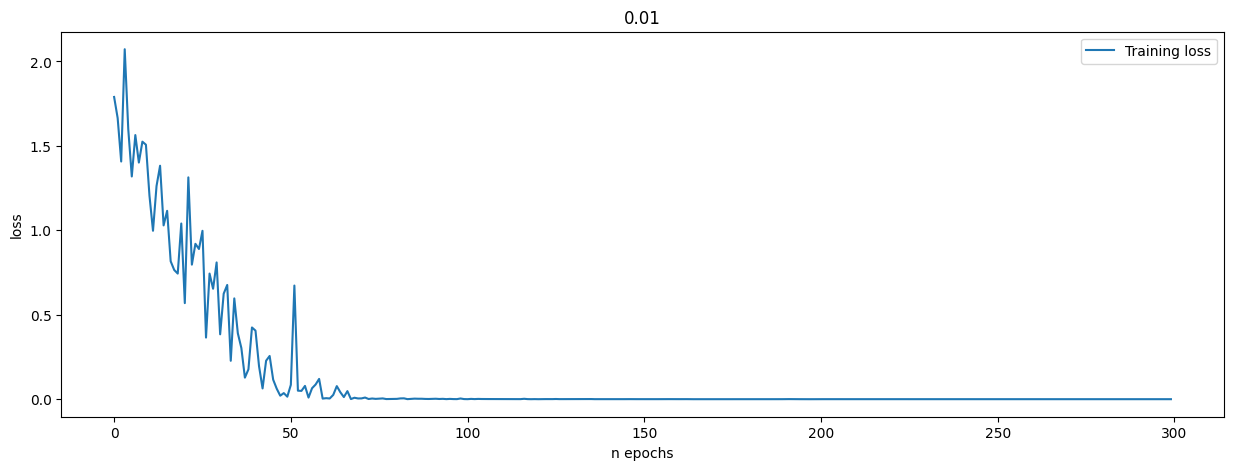

In [47]:
plt.figure
figure(figsize=(15, 5))
plt.plot(loss_history, label="Training loss")
plt.xlabel("n epochs")
plt.ylabel("loss")
plt.legend()
plt.title(learning_rate)
plt.show()

In [48]:
#!!! careful, dont override other models !!!

#torch.save(model.state_dict(), file_path+'p2b_0.01_300e.pt')

#Load model

#model.load_state_dict(torch.load(file_path+'p2b_0.001.pt'))

Text(0.5, 47.7222222222222, 'Predicted label')

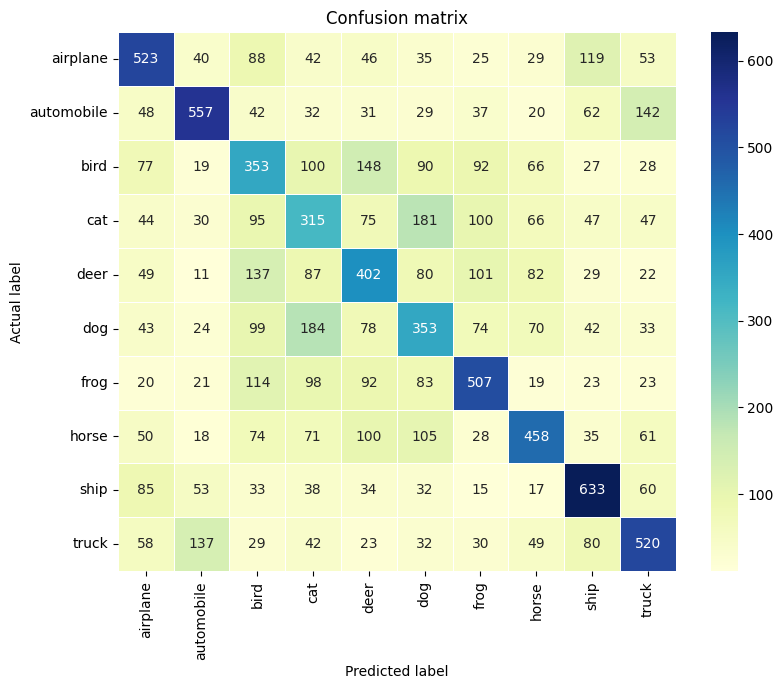

In [49]:
#Confusion matrix
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

nb_classes = 10
cnf_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for imgs, labels in val_loader:

        outputs = model(imgs.view(imgs.shape[0], -1))
        _, preds = torch.max(outputs, 1)

        for t, p in zip(labels.view(-1), preds.view(-1)):
                cnf_matrix[t.long(), p.long()] += 1

# create heatmap
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',linewidths=0.5,  xticklabels=class_names, yticklabels=class_names, ax=ax)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [50]:
cm = pd.DataFrame(cnf_matrix)

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

f1_score = (2*recall*precision) / (recall+precision)

d = {'class':class_names, 'precision':precision, 'recall':recall, 'f1-score':f1_score}
performance = pd.DataFrame(data = d)
performance

,activity,precision,recall,f1-score
0,airplane,0.524574,0.523,0.523786
1,automobile,0.612088,0.557,0.583246
2,bird,0.331767,0.353,0.342054
3,cat,0.312190,0.315,0.313589
4,deer,0.390671,0.402,0.396254
5,dog,0.346078,0.353,0.349505
6,frog,0.502478,0.507,0.504729
7,horse,0.522831,0.458,0.488273
8,ship,0.577028,0.633,0.603720
9,truck,0.525784,0.520,0.522876


In [51]:
#Training Set accuracy

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)

correct_train = 0
total_train = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total_train += labels.shape[0]
        correct_train += int((predicted == labels).sum())

In [52]:
#Validation Set accuarcy

val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct_val = 0
total_val = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total_val += labels.shape[0]
        correct_val += int((predicted == labels).sum())

In [53]:
precision_mean = np.sum(performance['precision']) / 10
recall_mean = np.sum(performance['recall']) / 10
f1_mean = np.sum(performance['f1-score']) / 10

print("Accuracy:   %.4f" % (correct_val / total_val))
print("Precsision: %.4f" % precision_mean)
print("Recall:     %.4f" % recall_mean)
print("F1-score:   %.4f" % f1_mean)

print('\n')
print("Training Accuracy: %.4f" % (correct_train / total_train))

Accuracy:   0.4621
Precsision: 0.4645
Recall:     0.4621
F1-score:   0.4628


Training Accuracy: 1.0000
